In [1]:
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
from typing import List
import seaborn as sbn
from IPython.display import Markdown

plotting_config = {"figure.figsize": (15,10),
           'axes.titlesize': 24,
           'axes.labelsize': 20,
           'legend.fontsize': 18,
           'xtick.labelsize': 16,
           'ytick.labelsize': 16,
           'axes.labelpad': 15,
           'axes.facecolor': 'white'}

sbn.set(rc=plotting_config)

In [2]:
# MATPLOTLIB CONFIG
plt.rcParams['axes.facecolor'] = plotting_config['axes.facecolor']
plt.rcParams['figure.figsize'] = plotting_config['figure.figsize']
plt.rcParams['axes.titlesize'] = plotting_config['axes.titlesize']
plt.rcParams['axes.labelsize'] = plotting_config['axes.labelsize']
plt.rcParams['legend.fontsize'] = plotting_config['legend.fontsize']
plt.rcParams['xtick.labelsize'] = plotting_config['xtick.labelsize']
plt.rcParams['ytick.labelsize'] = plotting_config['ytick.labelsize']
plt.rcParams['axes.labelpad'] = plotting_config['axes.labelpad']

In [3]:
# sliwkowy, grafitowy, sloneczny, wrzosowy
colors = ['#965F77', '#3C3C4C', '#FED542', '#B4A0AA']
sbn.set_palette(sbn.color_palette(colors))

In [4]:
PROJECT_MAIN_PATH = pathlib.Path().absolute().parent
CODE_MAIN_PATH = PROJECT_MAIN_PATH / 'src'
DATA_MAIN_PATH = CODE_MAIN_PATH / 'data_gather'
CHARTS_MAIN_PATH = PROJECT_MAIN_PATH / 'charts/PT'

EVENCHECK_GATE_PT_PATH = DATA_MAIN_PATH / 'pt/EVENCHECKgate'
EVENCHECK_CGP_PATH = DATA_MAIN_PATH / 'cgp/EVENCHECKgate'
EVENCHECK_SA_PATH = DATA_MAIN_PATH / 'cgpsa/EVENCHECKgate'

# Metrics

In [5]:
def correct_rate(df: pd.DataFrame, column='potential') -> float:
    return round(df[df[column]==0.0][column].count()/df[column].count() *100, 2)

In [6]:
def mean_number_of_steps(df: pd.DataFrame, calc_column='iteration', filter_column='potential') -> float:
    return round(df[df[filter_column]==0.0][calc_column].mean(), 2)

In [7]:
def calc_mns_series(df: pd.DataFrame, groupby: str) -> pd.DataFrame:
    indices = df[groupby].unique()
    results = {groupby: [], 'mns': []}
    for ind in indices:
        results[groupby].append(ind)
        results['mns'].append(mean_number_of_steps(df[df[groupby]==ind]))
    return pd.DataFrame(results, index=results[groupby])

In [8]:
def calc_cr_series(df: pd.DataFrame, groupby: str) -> pd.DataFrame:
    indices = df[groupby].unique()
    results = {groupby: [], 'cr': []}
    for ind in indices:
        results[groupby].append(ind)
        results['cr'].append(correct_rate(df[df[groupby]==ind]))
    return pd.DataFrame(results, index=results[groupby])

# Data loading

In [9]:
df_evencheck_pt_diff_switch_step = pd.read_csv(EVENCHECK_GATE_PT_PATH / 'pt_example_numsim30_switch_steps1_50_steps5000_pt_const_sa_const.csv')
df_evencheck_pt_example = pd.read_csv(EVENCHECK_GATE_PT_PATH / 'pt_example_numsim300_switch_step10_steps5000_pt_const_sa_const.csv')
df_evencheck_pt_optimal_temp_calc = pd.read_csv(EVENCHECK_GATE_PT_PATH / 'pt_evencheck_numsim300_switch_step10_steps5000_ptscheme_gaussian1_sa_const_optimal_temp_calculation.csv')
df_evencheck_pt_optimal_number_of_copies = pd.read_csv(EVENCHECK_GATE_PT_PATH / 'pt_evencheck_numsim50_switch_step40_steps5000_ptscheme_gaussian1_sa_const_optimal_num_of_copies.csv')
df_evencheck_pt_optimal_number_of_max_steps = pd.read_csv(EVENCHECK_GATE_PT_PATH / 'pt_evencheck_numsim50_switch_step40_steps[100, 1000, 10000]_ptscheme_gaussian1_sa_const_optimal_max_steps.csv')
df_evencheck_cgp_vs_pt_comparison = pd.read_csv(EVENCHECK_CGP_PATH / 'cgp_alone_pt_comparison_retries50_num_sim_99_steps_5000.csv')
df_evencheck_sa_vs_pt_comparison = pd.read_csv(EVENCHECK_SA_PATH / 'cgp_sa_pt_comparison_retries50_num_sim_99_steps_5000.csv')

# Analysis

## Parallel Tempering example

In [10]:
def plot_scatter(dfs: List[pd.DataFrame], 
                 legend: List[str],
                 save_path: pathlib.Path,
                 column: str,
                 title: str,
                 ylabel: str, 
                 xlabel: str,
                 xscale: str = None,
                 yscale: str = None,
                 xlim = None,
                 xticks: List[int] = None,
                ) -> None:
    for df, color in zip(dfs, colors):
        plt.scatter(df.index, df[column], color=color, marker='D')
        plt.plot(df.index, df[column], color=color)
    plt.title(title)
    plt.legend(legend)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.grid(color='lightgray', linestyle='--', linewidth=1)
    if xscale:
        plt.xscale(xscale)
    if yscale:
        plt.yscale(yscale)
    if xlim:
        plt.xlim(xlim)
    if xticks:
        plt.xticks(xticks)
    plt.tight_layout()
    plt.savefig(save_path / f'{title}.pdf', dpi=600, format='pdf')

In [11]:
def double_axis_plot(dataset_1: pd.DataFrame, 
                     dataset_2: pd.DataFrame,  
                     save_path: pathlib.Path,
                     legend: List[str],
                     plot_type: str,
                     title: str,
                     xlabel: str,
                     y_1_label: str,
                     y_2_label: str,
                     x: str,
                     y_1: str = 'mns',
                     y_2: str = 'cr',
                     xscale: str = None,
                     xlim = None,
                     yscale = None,
                     marker: str = 'D',
                     colors: List[str] = colors,
                     xticks: List[int] = None
                    ) -> None:

    fig, ax1 = plt.subplots()
    
    if plot_type == 'plot':
        
        ax1.set_xlabel(xlabel)
        ax1.set_ylabel(y_1_label, color=colors[0])
        ax1.set_title(title)
        ax1.tick_params(axis='y', labelcolor=colors[0])
        
        ax1.scatter(dataset_1[x], dataset_1[y_1], color=colors[0], marker=marker)
        ax1.plot(dataset_1[x], dataset_1[y_1], color=colors[0], label='_nolegend_')

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        ax2.set_ylabel(y_2_label, color=colors[1])  # we already handled the x-label with ax1
        ax2.tick_params(axis='y', labelcolor=colors[1])
        
        ax2.scatter(dataset_1[x], dataset_2[y_2], color=colors[1], marker=marker)
        ax2.plot(dataset_1[x], dataset_2[y_2], color=colors[1], label='_nolegend_')
        
        fig.legend(legend)
        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        plt.grid(color='lightgray', linestyle='--', linewidth=1)
        
    if plot_type == 'scatter':
        ax1.set_xlabel(xlabel)
        ax1.set_ylabel(y_1_label, color=colors[0])
        ax1.set_title(title)
        ax1.tick_params(axis='y', labelcolor=colors[0])
        
        ax1.scatter(dataset_1[x], dataset_1[y_1], color=colors[0], marker=marker)
        ax1.plot(dataset_1[x], dataset_1[y_1], color=colors[0], label='_nolegend_')

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        ax2.set_ylabel(y_2_label, color=colors[1])  # we already handled the x-label with ax1
        ax2.tick_params(axis='y', labelcolor=colors[1])
        ax2.scatter(dataset_1[x], dataset_2[y_2], color=colors[1], marker=marker)
        ax2.plot(dataset_1[x], dataset_2[y_2], color=colors[1], label='_nolegend_')
        
        fig.legend(legend)
        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        plt.grid(color='lightgray', linestyle='--', linewidth=1)
        if xscale:
            plt.xscale(xscale)
        if yscale:
            plt.yscale(yscale)
        if xlim:
            plt.xlim(xlim)
        
    if plot_type == 'bar':
        ax1.set_xlabel(xlabel)
        ax1.set_ylabel(y_1_label, color=colors[0])
        ax1.set_title(title)
        ax1.tick_params(axis='y', labelcolor=colors[0])
        
        ax1.bar(dataset_1[x], dataset_1[y_1], color=colors[0])

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        ax2.set_ylabel(y_2_label, color=colors[1])  # we already handled the x-label with ax1
        ax2.tick_params(axis='y', labelcolor=colors[1])
        ax2.bar(dataset_1[x], dataset_2[y_2], color=colors[1])

        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        plt.grid(color='lightgray', linestyle='--', linewidth=1)
    if xticks:
        plt.xticks(xticks)
    plt.savefig(save_path / f'{title}.pdf', dpi=600, format='pdf')

In [12]:
def plot_hist(data, 
              save_path: pathlib.Path=None,  
              title='Hist', 
              legend=None, 
              ylabel='y', 
              xlabel='x', 
              yscale=None,
              bins=None,
              colors=colors
             ):
    """
    Function plots histograms as lines
    
    param data: list of pandas DataFrame's
    type data: list
    """
    if bins:
        bin_values, bin_edges, _ = plt.hist(data, bins=bins, color=colors[0])
    else:
        bin_values, bin_edges, _ = plt.hist(data, color=colors[0])
        
    bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if yscale:
        plt.yscale(yscale)
    plt.title(title)
    if legend:
        plt.legend(legend)
    plt.grid(color='lightgray', linestyle='--', linewidth=1)
    if save_path:
        plt.savefig(save_path / f'{title}.pdf', dpi=600, format='pdf')
    plt.tight_layout()
    plt.show()
    
    return bin_values, bin_edges, bin_centers

In [13]:
def plot_hist_line(data: List[pd.DataFrame], 
                   column: str, 
                   schemes: List[str], 
                   save_path: pathlib.Path, 
                   title: str, 
                   ylabel='y', 
                   xlabel='x',
                   xscale=None,
                   yscale=None,
                   xlim=(0,4900),
                   bw=0.01
                  ) -> None:
    """
    Function plots histograms as lines
    
    param data: list of pandas DataFrame's
    type data: list
    """
    
#     num_sim = len(data[data.sa_type==schemes[0]][column])
    
#     data_copy = [data[data.sa_type==scheme][data.potential==0.][column] for scheme in schemes]
    
#     bin_values, bin_edges, bin_centers = plot_hist(data_copy, ylabel=ylabel, xlabel=xlabel)
    
#     bin_values = np.array(bin_values) * 100 / num_sim
    
#     for num_set in range(len(data_copy)):
#         if len(data_copy)==1:
#             plt.plot(bin_centers, bin_values)
#         else:
#             plt.plot(bin_centers, bin_values[num_set])

    # data_copy = [data[data.sa_type==scheme][data.potential==0.][column] for scheme in schemes]
    
    fig, ax = plt.subplots()
    for df in data:
        sbn.kdeplot(df[column], ax=ax, cumulative=True, bw=bw)
        
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if xscale:
        plt.xscale(xscale)
    if yscale:
        plt.yscale(yscale)
    plt.title(title)
    plt.legend(schemes)
    plt.grid(color='lightgray', linestyle='--', linewidth=1)
    plt.xlim(xlim)
    plt.tight_layout()
    plt.savefig(save_path / f'{title}.pdf', dpi=600, format='pdf')
    plt.show()

In [14]:
def plot_bar(data: pd.DataFrame, 
                   column: str, 
                   groupby: str,
                   schemes: List[str], 
                   save_path: pathlib.Path, 
                   title: str, 
                   ylabel='y', 
                   xlabel='x',
                   xscale=None,
                   yscale=None,
                   xlim=(0,4900)
                  ) -> None:
    data.groupby(groupby).mean()[column].plot.bar()
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if xscale:
        plt.xscale(xscale)
    if yscale:
        plt.yscale(yscale)
    plt.title(title)
    plt.legend(schemes)
    plt.grid(color='lightgray', linestyle='--', linewidth=1)
    plt.tight_layout()
    plt.savefig(save_path / f'{title}.pdf', dpi=600, format='pdf')
    plt.show()

In [15]:
def plot_bar_summary(df: pd.DataFrame, 
             save_path: pathlib.Path,
             title: str,
             xlabel: str = 'Simulated Annealing type',
             y1_label: str = 'CR [%]',
             y2_label: str = 'MNS',
             x: str = 'sa_type',
             y_1: str = 'cr',
             y_2: str = 'mns',
             pad: float = 3.0,
             colors=colors
            ):
    
    df_1 = calc_cr_series(df, groupby=x)
    df_2 = calc_mns_series(df, groupby=x)
    
    fig, axes = plt.subplots(2, 1)
    
    fig.suptitle(title, size=plotting_config['axes.titlesize'])
    
    palette = sbn.color_palette(palette=colors, n_colors=4)
    
    sbn.barplot(ax=axes[0], data=df_1, x=x, y=y_1)
    
    for row, num in zip(df_1.iterrows(), [x for x in range(len(df_1.index))]):
        index, row = row
        axes[0].text(num, row.cr, round(row.cr,2), color='black', ha="center", size=plotting_config['xtick.labelsize'])
    
    sbn.barplot(ax=axes[1], data=df_2, x=x, y=y_2)
    
    for row, num in zip(df_2.iterrows(), [x for x in range(len(df_2.index))]):
        index, row = row
        axes[1].text(num, row.mns, round(row.mns), color='black', ha="center", size=plotting_config['xtick.labelsize'])
    
    axes[0].grid(color='lightgray', linestyle='--', linewidth=1)
    axes[1].grid(color='lightgray', linestyle='--', linewidth=1)
    
    axes[0].set(xlabel=xlabel)
    axes[1].set(xlabel=xlabel)
    
    axes[0].set(ylabel=y1_label)
    axes[1].set(ylabel=y2_label)
    
    fig.tight_layout(pad=3.0)
    
    fig.savefig(save_path / f'{title}.pdf', dpi=600, format='pdf')

/Users/math/Desktop/EDMI/Mgr/CGP_mgr/venv/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.01 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


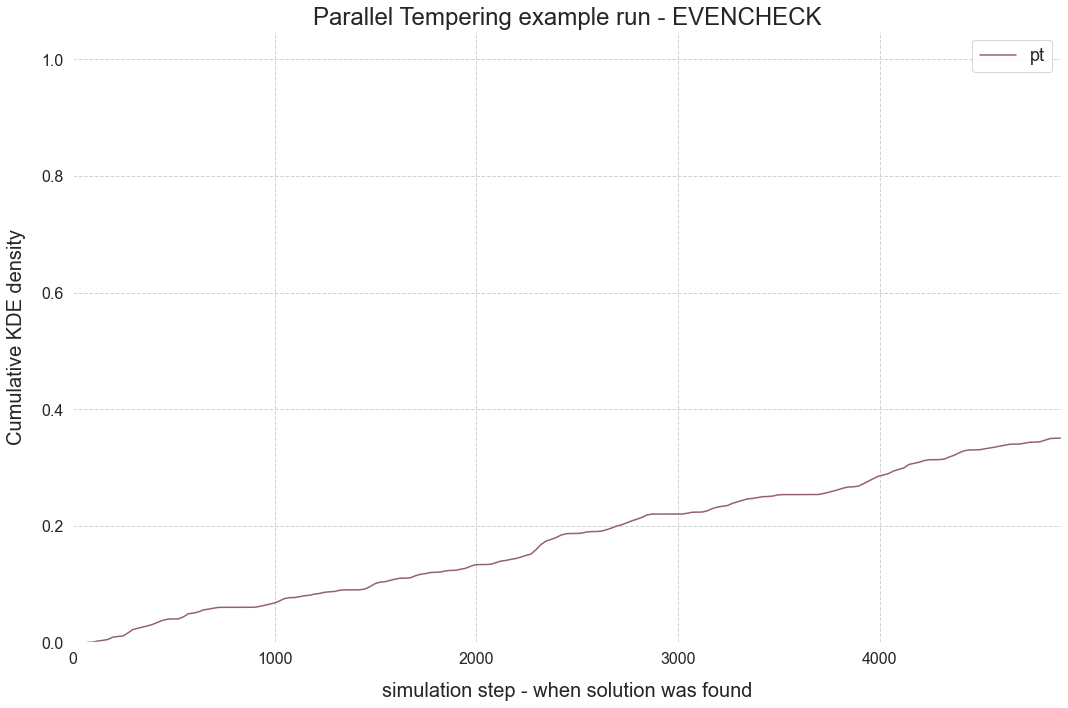

In [16]:
plot_hist_line([df_evencheck_pt_example], 
               schemes=['pt'], 
               column='iteration', 
               save_path=CHARTS_MAIN_PATH, 
               title='Parallel Tempering example run - EVENCHECK',
               ylabel='Cumulative KDE density',
               xlabel='simulation step - when solution was found'
              )

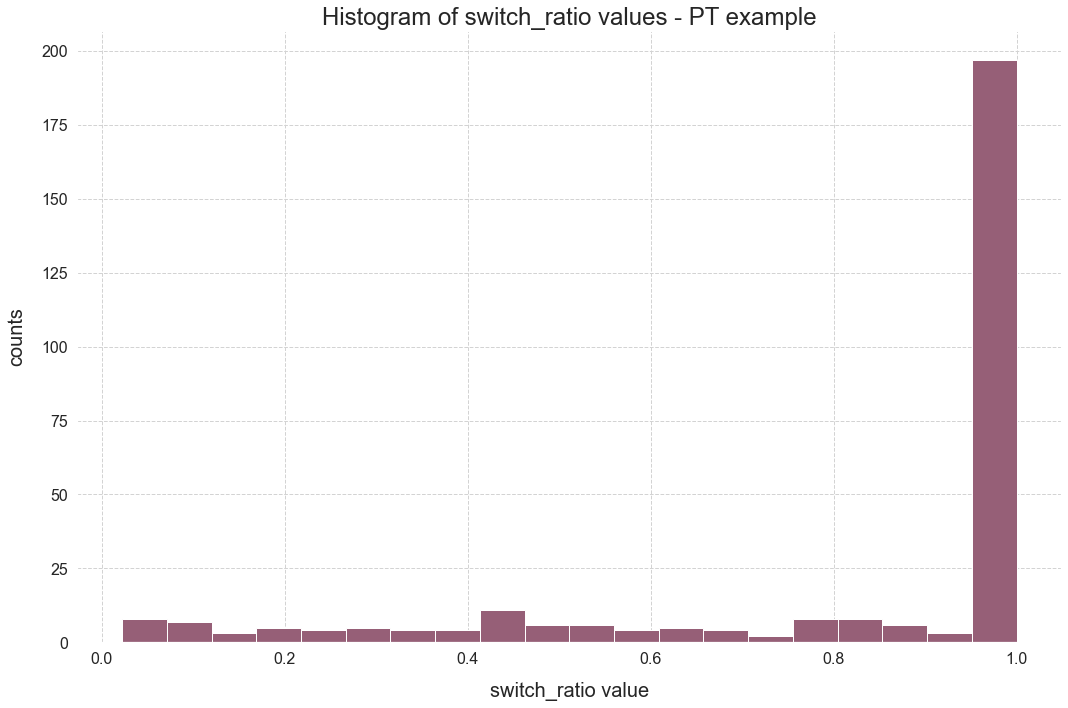

(array([  8.,   7.,   3.,   5.,   4.,   5.,   4.,   4.,  11.,   6.,   6.,
          4.,   5.,   4.,   2.,   8.,   8.,   6.,   3., 197.]),
 array([0.022 , 0.0709, 0.1198, 0.1687, 0.2176, 0.2665, 0.3154, 0.3643,
        0.4132, 0.4621, 0.511 , 0.5599, 0.6088, 0.6577, 0.7066, 0.7555,
        0.8044, 0.8533, 0.9022, 0.9511, 1.    ]),
 array([0.04645, 0.09535, 0.14425, 0.19315, 0.24205, 0.29095, 0.33985,
        0.38875, 0.43765, 0.48655, 0.53545, 0.58435, 0.63325, 0.68215,
        0.73105, 0.77995, 0.82885, 0.87775, 0.92665, 0.97555]))

In [17]:
plot_hist(data=[df_evencheck_pt_example.switch_ratio],
          save_path=CHARTS_MAIN_PATH,
          title='Histogram of switch_ratio values - PT example',
          xlabel='switch_ratio value',
          ylabel='counts',
          bins=20
         )

## Solution goodness vs switch_step

In [18]:
switch_step_mns = calc_mns_series(df_evencheck_pt_diff_switch_step, groupby='switch_step')

In [19]:
switch_step_cr = calc_cr_series(df_evencheck_pt_diff_switch_step, groupby='switch_step')

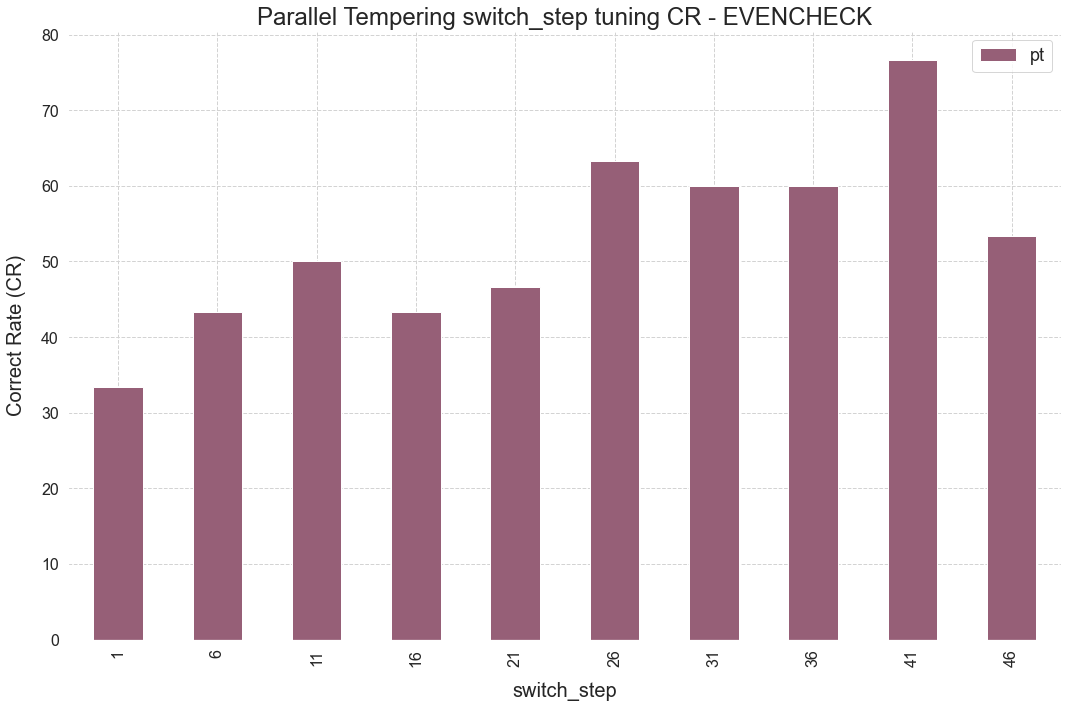

In [20]:
plot_bar(switch_step_cr, 
         schemes=['pt'], 
         column='cr',
         groupby='switch_step',
         save_path=CHARTS_MAIN_PATH, 
         title='Parallel Tempering switch_step tuning CR - EVENCHECK',
         ylabel='Correct Rate (CR)',
         xlabel='switch_step'
         )

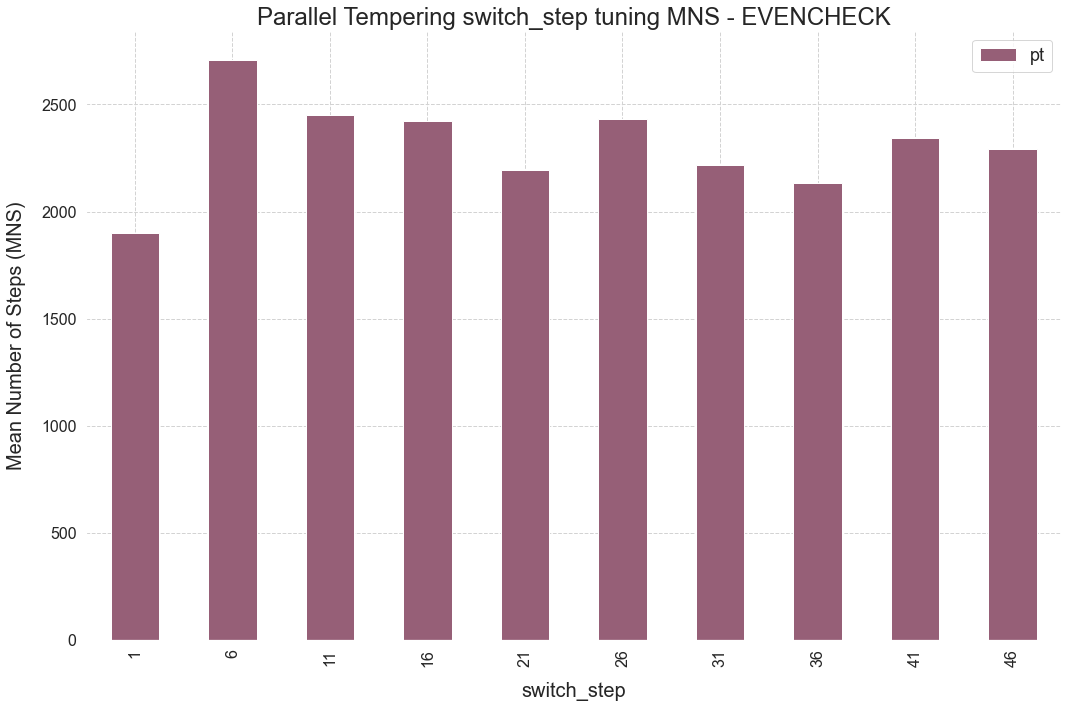

In [21]:
plot_bar(switch_step_mns, 
         schemes=['pt'], 
         column='mns',
         groupby='switch_step',
         save_path=CHARTS_MAIN_PATH, 
         title='Parallel Tempering switch_step tuning MNS - EVENCHECK',
         ylabel='Mean Number of Steps (MNS)',
         xlabel='switch_step'
         )

## Solution goodness vs Optimal Temperatures ratio

/Users/math/Desktop/EDMI/Mgr/CGP_mgr/venv/lib/python3.8/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.01 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


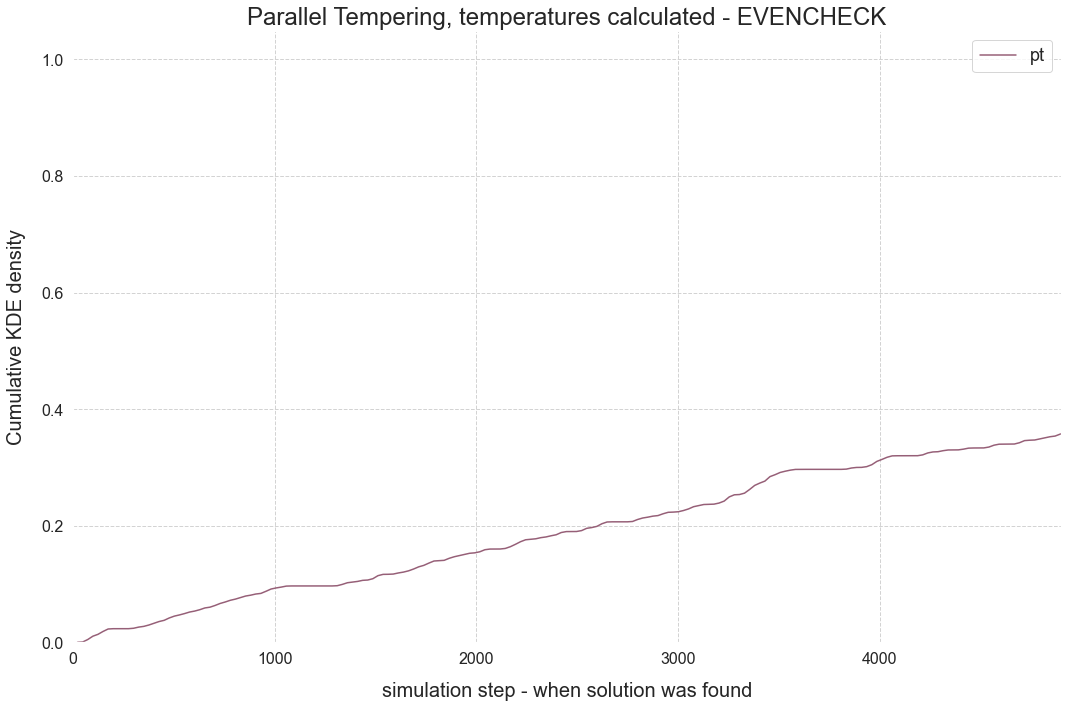

In [22]:
plot_hist_line([df_evencheck_pt_optimal_temp_calc], 
               schemes=['pt'], 
               column='iteration', 
               save_path=CHARTS_MAIN_PATH, 
               title='Parallel Tempering, temperatures calculated - EVENCHECK',
               ylabel='Cumulative KDE density',
               xlabel='simulation step - when solution was found'
              )

#### Comment

Using the technique from the paper on Parallel Tempering - the overall quality of the solution is not better. 

### Acceptance ratio

In [23]:
mean_acc_ratio = df_evencheck_pt_optimal_temp_calc.switch_ratio.mean()

Markdown(f"#### Mean switch ratio: {mean_acc_ratio}")

#### Mean switch ratio: 0.8069

#### Comment 

The switch ratio is to big for this example. It should be considered to review the parameter in the calculation of optimal temperatures.

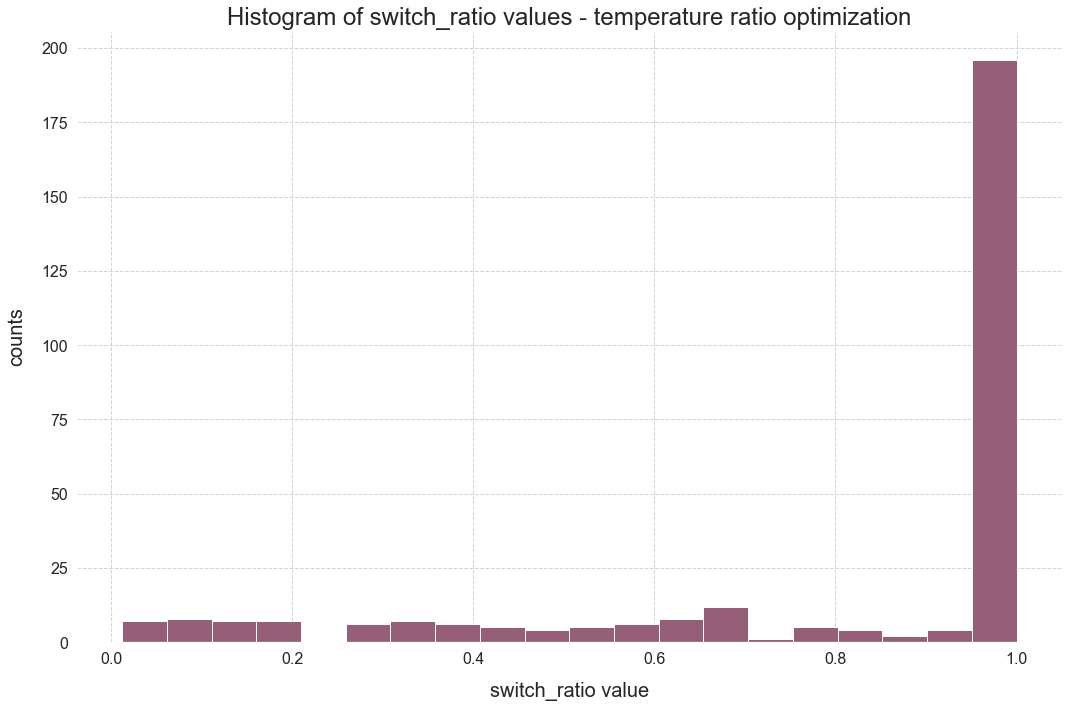

(array([  7.,   8.,   7.,   7.,   0.,   6.,   7.,   6.,   5.,   4.,   5.,
          6.,   8.,  12.,   1.,   5.,   4.,   2.,   4., 196.]),
 array([0.012 , 0.0614, 0.1108, 0.1602, 0.2096, 0.259 , 0.3084, 0.3578,
        0.4072, 0.4566, 0.506 , 0.5554, 0.6048, 0.6542, 0.7036, 0.753 ,
        0.8024, 0.8518, 0.9012, 0.9506, 1.    ]),
 array([0.0367, 0.0861, 0.1355, 0.1849, 0.2343, 0.2837, 0.3331, 0.3825,
        0.4319, 0.4813, 0.5307, 0.5801, 0.6295, 0.6789, 0.7283, 0.7777,
        0.8271, 0.8765, 0.9259, 0.9753]))

In [24]:
plot_hist(data=df_evencheck_pt_optimal_temp_calc.switch_ratio,
          save_path=CHARTS_MAIN_PATH,
          title='Histogram of switch_ratio values - temperature ratio optimization',
          xlabel='switch_ratio value',
          ylabel='counts',
          bins=20
         )

#### Comment

As we can see the acceptance ratio equals to 1 in 2/3 of the simulations. It should be considered as not desired behavior. Therefore the differences in the annealing_parameter between systems should be reconsidered.

## Optimal number of copies

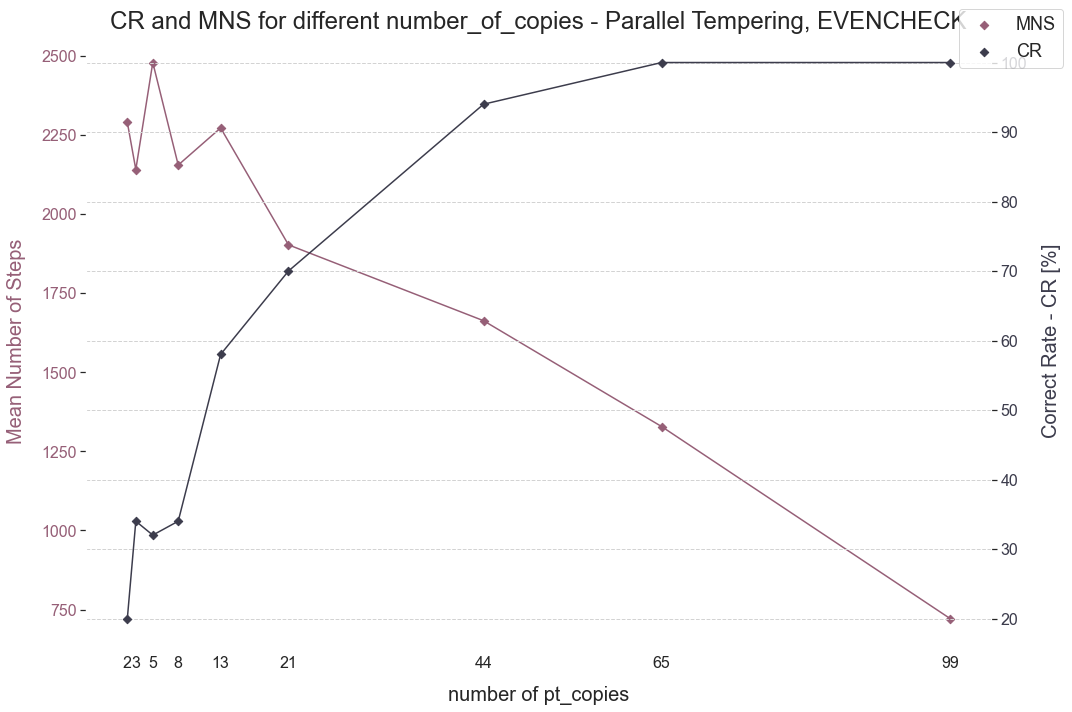

In [25]:
double_axis_plot(calc_mns_series(df_evencheck_pt_optimal_number_of_copies, groupby='pt_copies'),
                 calc_cr_series(df_evencheck_pt_optimal_number_of_copies, groupby='pt_copies'),
                 colors=colors,
                 save_path=CHARTS_MAIN_PATH,
                 legend=['MNS', 'CR'],
                 plot_type='scatter',
                 title='CR and MNS for different number_of_copies - Parallel Tempering, EVENCHECK',
                 xlabel='number of pt_copies',
                 y_1_label='Mean Number of Steps',
                 y_2_label='Correct Rate - CR [%]',
                 x='pt_copies',
                 y_1='mns',
                 y_2='cr',
                 xscale=None,
                 xticks=list(df_evencheck_pt_optimal_number_of_copies.pt_copies.unique())
                )

### switch_ratio for the Optimal number of copies

In [ ]:
plot_scatter([df_evencheck_pt_optimal_number_of_copies.groupby(['pt_copies']).mean()],
             legend=['evencheck'], 
             save_path=CHARTS_MAIN_PATH, 
             column='switch_ratio',
             title='Mean switch_ratio vs number of pt_copies',
             xlabel='number of pt_copies',
             ylabel='Mean switch_ratio',
             xticks=list(df_evencheck_pt_optimal_number_of_copies.pt_copies.unique())
            )

### optimal number of copies switch_ratio hist

In [ ]:
plot_hist(data=df_evencheck_pt_optimal_number_of_copies[df_evencheck_pt_optimal_number_of_copies.pt_copies == 99].switch_ratio,
          save_path=CHARTS_MAIN_PATH,
          title='Histogram of switch_ratio values - number_of_copies optimization',
          xlabel='switch_ratio value',
          ylabel='counts',
          bins=20
         )

## optimal max_steps value

In [ ]:
double_axis_plot(calc_mns_series(df_evencheck_pt_optimal_number_of_max_steps, groupby='max_steps'),
                 calc_cr_series(df_evencheck_pt_optimal_number_of_max_steps, groupby='max_steps'),
                 colors=colors,
                 save_path=CHARTS_MAIN_PATH,
                 legend=['MNS', 'CR'],
                 plot_type='scatter',
                 title='CR and MNS for different max_steps - Parallel Tempering, EVENCHECK',
                 xlabel='number of max_steps',
                 y_1_label='Mean Number of Steps',
                 y_2_label='Correct Rate - CR [%]',
                 x='max_steps',
                 y_1='mns',
                 y_2='cr',
                 xscale='log',
                 #xticks=list(df_evencheck_pt_optimal_number_of_max_steps.pt_copies.unique())
                )

## KDE for 99 copies

In [ ]:
N = 99

In [ ]:
df_pt_optimal = df_evencheck_pt_optimal_number_of_copies[df_evencheck_pt_optimal_number_of_copies.pt_copies == N]
df_sa_optimal = df_evencheck_sa_vs_pt_comparison.groupby(df_evencheck_sa_vs_pt_comparison.index // N).min()
df_cgp_optimal = df_evencheck_cgp_vs_pt_comparison.groupby(df_evencheck_cgp_vs_pt_comparison.index // N).min()

In [ ]:
plot_hist_line([df_pt_optimal,
                df_cgp_optimal,
                df_sa_optimal], 
               schemes=['PT', 'CGP_alone', 'SA'], 
               column='iteration', 
               save_path=CHARTS_MAIN_PATH, 
               title='Parallel Tempering, CGP and Simulated Annealing comparison - EVENCHECK',
               ylabel='Cumulative KDE density',
               xlabel='simulation step - when solution was found',
               xlim=(0, 5000)
              )

## MNS and CR for 99 copies

### MNS

In [ ]:
mean_number_of_steps(df_pt_optimal)

In [ ]:
mean_number_of_steps(df_cgp_optimal)

In [ ]:
mean_number_of_steps(df_sa_optimal)

### CR

In [ ]:
correct_rate(df_pt_optimal)

In [ ]:
correct_rate(df_cgp_optimal)

In [ ]:
correct_rate(df_sa_optimal)

### Visualize

In [ ]:
df_pt_optimal_filtered = df_pt_optimal.loc[:, df_cgp_optimal.columns.drop('annealing_param')]

In [ ]:
df_pt_optimal_filtered['Algorithm'] = 'PT'
df_sa_optimal['Algorithm'] = 'SA'
df_cgp_optimal['Algorithm'] = 'CGP_alone'

In [ ]:
df_summary = pd.concat([df_pt_optimal_filtered,
                df_cgp_optimal,
                df_sa_optimal])

In [ ]:
plot_bar_summary(df_summary,
                 save_path = CHARTS_MAIN_PATH,
                 title='CR and MNS for different algorithms - EVENCHECK gate',
                 x='Algorithm',
                 xlabel='Algorithm variant'
)

#### Comment

Seem that more copies of the system could affect the accuracy of the algorithm, however one should say that the experiment was held using the same range of Temperatures, btu different sampling. It seem tought, that number of copies of the system highly affect the accuracy of the solution.